# hypertension transcriptome 20 features
# rainforcement learning n= 100
# binary classification

In [61]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sb

In [62]:
df = pd.read_csv("selected_M_best20.csv")
df = df.drop_duplicates()
print(df.head())

   ILMN_1655864  ILMN_1657898  ILMN_1671005  ILMN_1677756  ILMN_1687526  \
0        9.1206        8.9263       11.4310        9.9916        9.5725   
1        9.6620        8.6274       12.1278       10.5783        9.5859   
2        8.9047        8.3385       10.5202        9.3776        9.1329   
3        8.7785        8.2053       10.2085        8.4853        8.9398   
4        8.4493        8.2168       10.1140        8.5531        8.7135   

   ILMN_1701962  ILMN_1704335  ILMN_1713764  ILMN_1725707  ILMN_1758687  ...  \
0        9.0516        9.4571        7.9901       10.5066        9.3814  ...   
1        9.2065        9.0469        8.0947       11.0485        9.4561  ...   
2        8.3497        8.3345        8.0296        9.6670        8.8520  ...   
3        8.5285        8.4016        8.1067        9.6919        8.7720  ...   
4        8.4029        8.2367        8.0940        9.6350        8.8086  ...   

   ILMN_1765725  ILMN_1775304  ILMN_1780334  ILMN_1794233  ILMN_1804

In [63]:
def map_results(inpt):
    if inpt == 'control':
        return 0;

    else:
        return 1;

In [64]:
df['Results'] = df['Results'].apply(map_results)
print(df.head())

   ILMN_1655864  ILMN_1657898  ILMN_1671005  ILMN_1677756  ILMN_1687526  \
0        9.1206        8.9263       11.4310        9.9916        9.5725   
1        9.6620        8.6274       12.1278       10.5783        9.5859   
2        8.9047        8.3385       10.5202        9.3776        9.1329   
3        8.7785        8.2053       10.2085        8.4853        8.9398   
4        8.4493        8.2168       10.1140        8.5531        8.7135   

   ILMN_1701962  ILMN_1704335  ILMN_1713764  ILMN_1725707  ILMN_1758687  ...  \
0        9.0516        9.4571        7.9901       10.5066        9.3814  ...   
1        9.2065        9.0469        8.0947       11.0485        9.4561  ...   
2        8.3497        8.3345        8.0296        9.6670        8.8520  ...   
3        8.5285        8.4016        8.1067        9.6919        8.7720  ...   
4        8.4029        8.2367        8.0940        9.6350        8.8086  ...   

   ILMN_1765725  ILMN_1775304  ILMN_1780334  ILMN_1794233  ILMN_1804

In [65]:

df.describe()

,ILMN_1655864,ILMN_1657898,ILMN_1671005,ILMN_1677756,ILMN_1687526,ILMN_1701962,ILMN_1704335,ILMN_1713764,ILMN_1725707,ILMN_1758687,...,ILMN_1765725,ILMN_1775304,ILMN_1780334,ILMN_1794233,ILMN_1804988,ILMN_1812970,ILMN_1875248,ILMN_2082762,ILMN_2159384,Results
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,...,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,8.840350,8.361906,10.812333,9.293271,9.035799,8.636783,8.534474,8.286886,10.245039,8.886839,...,9.696534,10.817113,8.590240,8.665949,10.655081,8.365388,8.377289,10.579364,9.127508,0.707143
std,0.551345,0.348476,0.782629,0.642800,0.539149,0.346898,0.513085,0.277013,0.551783,0.447720,...,0.657034,0.880402,0.599733,0.390432,0.818998,0.479864,0.385426,0.766060,0.610215,0.456707
min,7.867800,7.708100,8.556300,8.120700,8.050000,7.972100,7.850900,7.737500,8.478500,8.265200,...,8.338700,8.496600,7.778300,8.013300,8.232400,7.618600,7.758800,8.692200,7.852400,0.000000
25%,8.413500,8.128750,10.215175,8.837150,8.630825,8.384500,8.131650,8.079800,9.764450,8.566575,...,9.205000,10.226825,8.044450,8.394500,10.034925,8.018450,8.110900,10.006300,8.679300,0.000000
50%,8.688850,8.254400,10.779850,9.161400,8.895850,8.544250,8.337950,8.236000,10.291350,8.726900,...,9.555950,10.762350,8.428450,8.539800,10.712250,8.155100,8.260100,10.407700,9.066750,1.000000
75%,9.193275,8.539750,11.397900,9.810575,9.337525,8.871950,8.919800,8.515125,10.689675,9.188925,...,10.141225,11.431350,9.092550,8.840075,11.190925,8.649025,8.596925,11.145700,9.559950,1.000000
max,10.372400,9.626600,12.475300,11.004100,10.546200,9.739900,9.805800,8.972600,11.875000,10.164300,...,11.179300,12.968600,10.091500,9.946000,12.366000,9.860400,9.530000,12.434900,10.433700,1.000000


In [66]:
df_features = list(df.columns)
print(df_features)

['ILMN_1655864', 'ILMN_1657898', 'ILMN_1671005', 'ILMN_1677756', 'ILMN_1687526', 'ILMN_1701962', 'ILMN_1704335', 'ILMN_1713764', 'ILMN_1725707', 'ILMN_1758687', 'ILMN_1763364', 'ILMN_1765725', 'ILMN_1775304', 'ILMN_1780334', 'ILMN_1794233', 'ILMN_1804988', 'ILMN_1812970', 'ILMN_1875248', 'ILMN_2082762', 'ILMN_2159384', 'Results']


In [67]:
X = df.drop(["Results"], axis =1);
Y = df["Results"]

(array([41.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 99.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

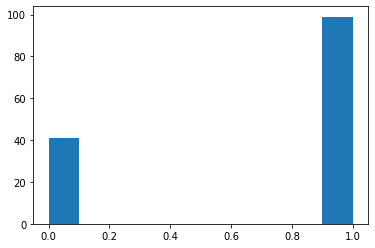

In [68]:
plt.hist(Y)

In [69]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=41)

In [71]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, Y_train)

# performing predictions on the test dataset
Y_pred = clf.predict(X_test)



accuracy = sm.accuracy_score(Y_test, Y_pred)
precision = sm.precision_score(Y_test, Y_pred)
recall = sm.recall_score(Y_test, Y_pred)
f1_score = sm.f1_score(Y_test, Y_pred)
print("Accuracy(%) = ", accuracy*100)
print("F1 Score (%) = ",f1_score*100)
print("Precision (%) = ",precision *100)
print("Recall (%) = ",recall*100)


Accuracy(%) =  92.85714285714286
F1 Score (%) =  95.45454545454545
Precision (%) =  91.30434782608695
Recall (%) =  100.0
